In [25]:
from IPython.display import HTML

html_code = """
<p>
<img style="float: right;margin:5px 20px 5px 1px; max-width:250px" 
src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png">
</p>
"""

HTML(html_code)

In [26]:
# Loading and Inspecting the Dataset

import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the dataset into two separate DataFrames

processed_nobel_df = pd.read_csv("C:\\Users\\jabhi\\Downloads\\Python.-Exploration-of-All-Nobel-Prize-Winners-and-Intriguing-Hidden-Patterns-main\\Python.-Exploration-of-All-Nobel-Prize-Winners-and-Intriguing-Hidden-Patterns-main\\Dataset\\nobel_dataset.csv", delimiter=',') # Required for almost all stages of our data analysis work

raw_nobel_df = pd.read_csv('Dataset/nobel_dataset.csv', delimiter=',') # Required for very few graphs for the sake of protecting the data integrity of other Nobel Prize winners lacking data


print('ReadMe: ', '\n')

print('Please note that you will find two DataFrames made of the same dataset. The difference between the two is that the Processed DF will include all records',
      "purified of null values (NaNs) in certain columns, such as 'Birth Date',    'Birth Country' and 'Sex'", 
      'whereas the Raw DF will include all records regardless of having NaNs in the columns.', 
      '   I am doing this to protect the data integrity within some graphs that I am visualising!', '\n', '\n', '\n')



# Checking the dimensions of the initial DataFrame

print(f"* Number of rows and columns that DataFrames initially have are respectively {raw_nobel_df.shape}.", '\n')  

raw_nobel_df.info()

ReadMe:  

Please note that you will find two DataFrames made of the same dataset. The difference between the two is that the Processed DF will include all records purified of null values (NaNs) in certain columns, such as 'Birth Date',    'Birth Country' and 'Sex' whereas the Raw DF will include all records regardless of having NaNs in the columns.    I am doing this to protect the data integrity within some graphs that I am visualising! 
 
 

* Number of rows and columns that DataFrames initially have are respectively (1000, 18). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5  

# Data Preprocessing Steps for the Raw DataFrame:

In [27]:
# Only Subsetting Required Columns

only_columns_to_keep = ['year', 'category', 'full_name']

raw_nobel_df = raw_nobel_df[only_columns_to_keep]


# Creating the Decade Column by resorting to the Pandas cut() function

decade_bins = [1900, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]

decade_labels = ['1900s', '1910s', '1920s', '1930s', '1940s', 
          '1950s', '1960s', '1970s', '1980s', '1990s',
          '2000s', '2010s', '2020s']

raw_nobel_df['decade'] = pd.cut(raw_nobel_df['year'], bins=decade_bins, labels=decade_labels)



print(f"After dropping all non-required columns while keeping in all the 911 records -", 
      "required solely for our Decade and  Category-based calculations: ", '\n')

raw_nobel_df

After dropping all non-required columns while keeping in all the 911 records - required solely for our Decade and  Category-based calculations:  



,year,category,full_name,decade
0,1901,Chemistry,Jacobus Henricus van 't Hoff,1900s
1,1901,Literature,Sully Prudhomme,1900s
2,1901,Medicine,Emil Adolf von Behring,1900s
3,1901,Peace,Jean Henry Dunant,1900s
4,1901,Peace,Frédéric Passy,1900s
...,...,...,...,...
995,2023,Chemistry,Louis Brus,2020s
996,2023,Chemistry,Aleksey Yekimov,2020s
997,2023,Literature,Jon Fosse,2020s
998,2023,Peace,Narges Mohammadi,2020s


# Data Preprocessing Steps for the Processed DataFrame:

In [28]:
# Data Inspection and Handling


# Checking any duplicated records

print(f'Number of duplicated rows across all columns applicable at the outset is: {processed_nobel_df.duplicated().sum()}', '\n')  

print('Number of NaNs per column as raw as the dataset can be is: ')
print(processed_nobel_df.isna().sum(), '\n')


# Dropping all rows that have null value on the 'Birth_Date' column for our main DataFrame

processed_nobel_df = processed_nobel_df.dropna(subset='birth_date')

print("Number of NaNs per column after dropping null records on the 'birth_date' column is: ", '\n')
print(processed_nobel_df.isna().sum(), '\n', '\n')


# Dropping all other rows that have null value on the 'Birth_Country' column for our main DataFrame

processed_nobel_df = processed_nobel_df.dropna(subset='birth_country')

print("Number of NaNs per column after dropping null records on the 'birth_country' column is: ", '\n')
print(processed_nobel_df.isna().sum(), '\n', '\n')


print('After this operation, I conclude that almost all NaN values stem from Organization-based Nobel Prize winners.', '\n')
print("Seeing that all NaN values from the columns of 'sex', 'birth_date' and 'birth_country' are completely", 
      "eliminated, I can now work through the data analysis by mainly using the Processed DataFrame.", '\n')


# Dropping several columns not required at any stage of our analysis

processed_nobel_df = processed_nobel_df.drop(['laureate_id', 
                                              'birth_city', 'death_city'], axis=1).reset_index(drop=True)


Number of duplicated rows across all columns applicable at the outset is: 0 

Number of NaNs per column as raw as the dataset can be is: 
year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64 

Number of NaNs per column after dropping null records on the 'birth_date' column is:  

year                      0
category                  0
prize                     0
motivation               72
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date                0
bir

In [29]:
# Renaming Certain Country Names, Creation of New Columns and Dropping Old Ones


# Renaming former countries' names with today's names as well as making some slight changes to achieve a better data visibility on the graphs

replace_country_dict = {
    'Belgian Congo (now Democratic Republic of the Congo)': 'Democratic Republic of the Congo',
    'W&uuml;rttemberg (Germany)': 'Germany',
    'French protectorate of Tunisia (now Tunisia)': 'Tunisia',
    'USSR (now Russia)': 'Russia',
    'United States of America': 'USA',
    'United Kingdom': 'UK',
    'Czech Republic': 'Czechia',
    "People's Republic of China": 'China',
    'Prussia (Poland)': 'Poland',
    'Prussia (Germany)': 'Germany',
    'Schleswig (Germany)': 'Germany',
    'Faroe Islands (Denmark)': 'Faroe Islands',
    'Russian Empire (Poland)': 'Poland',
    'Austrian Empire (Czech Republic)': 'Czechia',
    'Hungary (Slovakia)': 'Slovakia',
    'Tuscany (Italy)': 'Italy',
    'Bavaria (Germany)': 'Germany',
    'British India (India)': 'India',
    'Austrian Empire (Italy)': 'Italy',
    'East Friesland (Germany)': 'Germany',
    'Russian Empire (Ukraine)': 'Ukraine',
    'Russian Empire (Latvia)': 'Latvia',
    'Hesse-Kassel (Germany)': 'Germany',
    'Germany (Russia)': 'Russia',
    'Mecklenburg (Germany)': 'Germany',
    'Prussia (Russia)': 'Russia',
    'Austria-Hungary (Slovenia)': 'Slovenia',
    'Java, Dutch East Indies (Indonesia)': 'Indonesia',
    'Austrian Empire (Austria)': 'Austria',
    'Germany (Poland)': 'Poland',
    'Württemberg (Germany)': 'Germany',
    'Austria-Hungary (Hungary)': 'Hungary',
    'Austria-Hungary (Austria)': 'Austria',
    'Austria-Hungary (Croatia)': 'Croatia',
    'Austria-Hungary (Slovenia)': 'Slovenia',
    'Russian Empire (Finland)': 'Finland',
    'Austria-Hungary (Poland)': 'Poland',
    'Austria-Hungary (Czech Republic)': 'Czechia',
    'Germany (France)': 'France',
    'French Algeria (Algeria)': 'Algeria',
    'Southern Rhodesia (Zimbabwe)': 'Zimbabwe',
    'Bosnia (Bosnia and Herzegovina)': 'Bosnia and Herzegovina',
    'Russian Empire (Azerbaijan)': 'Azerbaijan',
    'Ottoman Empire (Turkey)': 'Turkey',
    'Union of Soviet Socialist Republics (Russia)': 'Russia',
    'Austria-Hungary (Ukraine)': 'Ukraine',
    'Russian Empire (Belarus)': 'Belarus',
    'Austria-Hungary (Bosnia and Herzegovina)': 'Bosnia and Herzegovina',
    'Russian Empire (Russia)': 'Russia',
    'Poland (Lithuania)': 'Lithuania',
    'British West Indies (Saint Lucia)': 'Saint Lucia',
    'Crete (Greece)': 'Greece',
    'Ottoman Empire (Republic of Macedonia)': 'North Macedonia',
    'India (Pakistan)': 'Pakistan',
    'Russian Empire (Lithuania)': 'Lithuania',
    'Poland (Ukraine)': 'Ukraine',
    'German-occupied Poland (Poland)': 'Poland',
    'West Germany (Germany)': 'Germany',
    'Korea (South Korea)': 'South Korea',
    "Tibet (People's Republic of China)": "China",
    'Burma (Myanmar)': 'Myanmar',
    'Poland (Belarus)': 'Belarus',
    'British Mandate of Palestine (Israel)': 'Israel',
    'Free City of Danzig (Poland)': 'Poland',
    'Union of Soviet Socialist Republics (Belarus)': 'Belarus',
    'Gold Coast (Ghana)': 'Ghana',
    'Iran': 'Iran',
    'British Protectorate of Palestine (Israel)': 'Israel',
    'British India (Bangladesh)': 'Bangladesh',
    'Persia (Iran)': 'Iran',
    'Czechoslovakia (Czech Republic)': 'Czechia'
}

processed_nobel_df['birth_country'] = processed_nobel_df['birth_country'].replace(replace_country_dict, regex=False)



# Creating the Decade Column by resorting to the Pandas cut() function

decade_bins = [1900, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]

decade_labels = ['1900s', '1910s', '1920s', '1930s', '1940s', 
          '1950s', '1960s', '1970s', '1980s', '1990s',
          '2000s', '2010s', '2020s']

processed_nobel_df['decade'] = pd.cut(processed_nobel_df['year'], bins=decade_bins, labels=decade_labels)



# Creating the 'Age at Winning Nobel' Column

# Fixing dates whose month and day values both have '00' which is an invalid date format.

processed_nobel_df['birth_date'] = processed_nobel_df['birth_date'].str.replace('-00-', '-01-')
processed_nobel_df['birth_date'] = processed_nobel_df['birth_date'].str.replace('-00', '-01')


# This helps with any parsing errors (i.e., errors=coerce), replacing inconsistent data with 'NaT' to extract the year only
processed_nobel_df['birth_year'] = pd.to_datetime(processed_nobel_df['birth_date']).dt.year.astype('int64')  

processed_nobel_df['age_at_winning_nobel'] = processed_nobel_df['year'] - processed_nobel_df['birth_year']
processed_nobel_df = processed_nobel_df.drop(columns=['birth_year', 'birth_date'], axis=1) # Dropping no-longer-needed columns



# Swapping positions of the Nobel DataFrame Column

swapped_columns=['year', 'full_name', 'birth_country', 'age_at_winning_nobel', 'sex', 'category', 'prize',
                 'prize_share', 'motivation', 'decade', 'laureate_type', 'organization_name',
                 'organization_city', 'organization_country', 'death_country', 'death_date']
     

processed_nobel_df = processed_nobel_df[swapped_columns]

processed_nobel_df.tail(5)

,year,full_name,birth_country,age_at_winning_nobel,sex,category,prize,prize_share,motivation,decade,laureate_type,organization_name,organization_city,organization_country,death_country,death_date
962,2023,Louis Brus,USA,80,Male,Chemistry,The Nobel Prize in Chemistry 2023,1/3,"""for the discovery and synthesis of quantum dots""",2020s,Individual,Columbia University,"New York, NY",United States of America,NaN,NaN
963,2023,Aleksey Yekimov,Russia,78,Male,Chemistry,The Nobel Prize in Chemistry 2023,1/3,"""for the discovery and synthesis of quantum dots""",2020s,Individual,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN
964,2023,Jon Fosse,Norway,64,Male,Literature,The Nobel Prize in Literature 2023,1/1,"""for his innovative plays and prose which give...",2020s,Individual,NaN,NaN,NaN,NaN,NaN
965,2023,Narges Mohammadi,Iran,51,Female,Peace,The Nobel Peace Prize 2023,1/1,"""for her fight against the oppression of women...",2020s,Individual,NaN,NaN,NaN,NaN,NaN
966,2023,Claudia Goldin,USA,77,Female,Economics,The Sveriges Riksbank Prize in Economic Scienc...,1/1,"""for having advanced our understanding of wome...",2020s,Individual,Harvard University,"Cambridge, MA",United States of America,NaN,NaN


# 1. Top 10 countries securing most Nobel Prizes since its inception:

In [30]:
top_10_nobel_countries = processed_nobel_df['birth_country'].value_counts().sort_values(ascending=False).head(10)

print("Top 10 countries securing the most Nobel Prizes since its inception are as follows:", "\n")
print(top_10_nobel_countries)

# The 11th one is Austria with 19 times, hence not making it to the list for the 10th spot. 

Top 10 countries securing the most Nobel Prizes since its inception are as follows: 

birth_country
USA        291
UK          91
Germany     86
France      61
Sweden      30
Russia      29
Japan       28
Poland      27
Canada      21
Italy       20
Name: count, dtype: int64


# 2.1 Finding out the First Female Nobel Prize Winner:

In [31]:
female_nobel_df = processed_nobel_df[processed_nobel_df['sex'] == 'Female'].sort_values(by=['year'], ascending=True) # Subsetting the DataFrame by All Female Winners

female_nobel_df.reset_index(inplace=True)
female_nobel_df.drop('index', axis=1, inplace=True)

first_female_nobel_data = female_nobel_df[female_nobel_df['year'] == female_nobel_df['year'].min()] # Subsetting the DataFrame by First Female Winner(s) based on the earliest year
first_female_nobel_name = first_female_nobel_data['full_name'].tolist()

print(f"The first female Nobel Prize winner is {first_female_nobel_name[0]}.", '\n')

first_female_nobel_data

The first female Nobel Prize winner is Marie Curie, née Sklodowska. 



,year,full_name,birth_country,age_at_winning_nobel,sex,category,prize,prize_share,motivation,decade,laureate_type,organization_name,organization_city,organization_country,death_country,death_date
0,1903,"Marie Curie, née Sklodowska",Poland,36,Female,Physics,The Nobel Prize in Physics 1903,1/4,"""in recognition of the extraordinary services ...",1900s,Individual,NaN,NaN,NaN,France,1934-07-04


# 2.2 All Nobel Prize Female Winner Records winning the Nobel for the First Time:

In [32]:

# Subsetting the DataFrame by all female winners

female_nobel_df = processed_nobel_df[processed_nobel_df['sex'] == 'Female'].sort_values(by=['year'], ascending=True)


# Identifying multiple female winners

multiple_counter = female_nobel_df['full_name'].value_counts()
multiple_female_winners = multiple_counter[multiple_counter > 1].index # This functions as our filter to identify multiple winners' names


# Preparing a DataFrame including the first record of multiple winners

multiple_female_nobel_df = female_nobel_df[female_nobel_df['full_name'].isin(multiple_female_winners)]


# --- Bringing in only the first award record for multiple female award winners

first_of_multiple_female_winners = pd.DataFrame()

for female_winner_name in multiple_female_winners:
    
    enumerated_award_winner = multiple_female_nobel_df[(multiple_female_nobel_df['full_name'].str.contains(female_winner_name))]
    enumerated_award_winner = enumerated_award_winner[enumerated_award_winner['year'] == enumerated_award_winner['year'].min()]
    
    first_of_multiple_female_winners = pd.concat([first_of_multiple_female_winners, enumerated_award_winner], axis=0, ignore_index=True)



# Preparing a DataFrame which includes all winners being awarded this Prize only for once in their lifetime

single_female_winners = female_nobel_df[~female_nobel_df['full_name'].isin(multiple_female_winners)]



# Combining the two DataFrames by Axis-0

first_all_female_winners = pd.concat([single_female_winners, 
                 first_of_multiple_female_winners], axis=0).sort_values(by=['year']).reset_index(drop=True)

first_all_female_winners.head(10) # Out of a total of 48 records in total


,year,full_name,birth_country,age_at_winning_nobel,sex,category,prize,prize_share,motivation,decade,laureate_type,organization_name,organization_city,organization_country,death_country,death_date
0,1903,"Marie Curie, née Sklodowska",Poland,36,Female,Physics,The Nobel Prize in Physics 1903,1/4,"""in recognition of the extraordinary services ...",1900s,Individual,NaN,NaN,NaN,France,1934-07-04
1,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Czechia,62,Female,Peace,The Nobel Peace Prize 1905,1/1,NaN,1900s,Individual,NaN,NaN,NaN,Austria,1914-06-21
2,1909,Selma Ottilia Lovisa Lagerlöf,Sweden,51,Female,Literature,The Nobel Prize in Literature 1909,1/1,"""in appreciation of the lofty idealism, vivid ...",1900s,Individual,NaN,NaN,NaN,Sweden,1940-03-16
3,1926,Grazia Deledda,Italy,55,Female,Literature,The Nobel Prize in Literature 1926,1/1,"""for her idealistically inspired writings whic...",1920s,Individual,NaN,NaN,NaN,Italy,1936-08-15
4,1928,Sigrid Undset,Denmark,46,Female,Literature,The Nobel Prize in Literature 1928,1/1,"""principally for her powerful descriptions of ...",1920s,Individual,NaN,NaN,NaN,Norway,1949-06-10
5,1931,Jane Addams,USA,71,Female,Peace,The Nobel Peace Prize 1931,1/2,NaN,1930s,Individual,NaN,NaN,NaN,United States of America,1935-05-21
6,1935,Irène Joliot-Curie,France,38,Female,Chemistry,The Nobel Prize in Chemistry 1935,1/2,"""in recognition of their synthesis of new radi...",1930s,Individual,Institut du Radium,Paris,France,France,1956-03-17
7,1938,Pearl Buck,USA,46,Female,Literature,The Nobel Prize in Literature 1938,1/1,"""for her rich and truly epic descriptions of p...",1930s,Individual,NaN,NaN,NaN,United States of America,1973-03-06
8,1945,Gabriela Mistral,Chile,56,Female,Literature,The Nobel Prize in Literature 1945,1/1,"""for her lyric poetry which, inspired by power...",1940s,Individual,NaN,NaN,NaN,United States of America,1957-01-10
9,1946,Emily Greene Balch,USA,79,Female,Peace,The Nobel Peace Prize 1946,1/2,NaN,1940s,Individual,NaN,NaN,NaN,United States of America,1961-01-09


# 3.1 Finding out the First Male Nobel Prize Winners:

In [33]:
male_nobel_df = processed_nobel_df[processed_nobel_df['sex'] == 'Male'].sort_values(by=['year'], ascending=True)  # Subsetting the DataFrame by Male Winners

male_nobel_df.reset_index(inplace=True)
male_nobel_df.drop('index', axis=1, inplace=True)

first_male_nobel_data = male_nobel_df[male_nobel_df['year'] == male_nobel_df['year'].min()] # Subsetting the DataFrame by First Male Winners based on the earliest year
first_male_nobel_names = first_male_nobel_data['full_name'].tolist()
first_male_nobel_names = ', '.join(first_male_nobel_names) # As they are multiple winners, I am joining each list item by a comma under one string

print(f"The first male Nobel Prize winners are {first_male_nobel_names}.", '\n')

first_male_nobel_data

The first male Nobel Prize winners are Jacobus Henricus van 't Hoff, Sully Prudhomme, Emil Adolf von Behring, Jean Henry Dunant, Frédéric Passy, Wilhelm Conrad Röntgen. 



,year,full_name,birth_country,age_at_winning_nobel,sex,category,prize,prize_share,motivation,decade,laureate_type,organization_name,organization_city,organization_country,death_country,death_date
0,1901,Jacobus Henricus van 't Hoff,Netherlands,49,Male,Chemistry,The Nobel Prize in Chemistry 1901,1/1,"""in recognition of the extraordinary services ...",1900s,Individual,Berlin University,Berlin,Germany,Germany,1911-03-01
1,1901,Sully Prudhomme,France,62,Male,Literature,The Nobel Prize in Literature 1901,1/1,"""in special recognition of his poetic composit...",1900s,Individual,NaN,NaN,NaN,France,1907-09-07
2,1901,Emil Adolf von Behring,Poland,47,Male,Medicine,The Nobel Prize in Physiology or Medicine 1901,1/1,"""for his work on serum therapy, especially its...",1900s,Individual,Marburg University,Marburg,Germany,Germany,1917-03-31
3,1901,Jean Henry Dunant,Switzerland,73,Male,Peace,The Nobel Peace Prize 1901,1/2,NaN,1900s,Individual,NaN,NaN,NaN,Switzerland,1910-10-30
4,1901,Frédéric Passy,France,79,Male,Peace,The Nobel Peace Prize 1901,1/2,NaN,1900s,Individual,NaN,NaN,NaN,France,1912-06-12
5,1901,Wilhelm Conrad Röntgen,Germany,56,Male,Physics,The Nobel Prize in Physics 1901,1/1,"""in recognition of the extraordinary services ...",1900s,Individual,Munich University,Munich,Germany,Germany,1923-02-10


# 3.2 All Nobel Prize Male Winner Records winning the Nobel for the First Time:

In [34]:
# Subsetting the DataFrame by all male winners

male_nobel_df = processed_nobel_df[processed_nobel_df['sex'] == 'Male'].sort_values(by=['year'], ascending=True)


# Identifying multiple male winners

multiple_counter = male_nobel_df['full_name'].value_counts()
multiple_male_winners = multiple_counter[multiple_counter > 1].index.tolist() # This functions as our filter to identify multiple winners' names



# Preparing a DataFrame including the first record of multiple winners

multiple_male_nobel_df = male_nobel_df[male_nobel_df['full_name'].isin(multiple_male_winners)]


# --- Bringing in only the first award record for multiple male award winners

first_of_multiple_male_winners = pd.DataFrame()

for male_winner_name in multiple_male_winners:
    
    enumerated_award_winner = multiple_male_nobel_df[(multiple_male_nobel_df['full_name'].str.contains(male_winner_name))]
    enumerated_award_winner = enumerated_award_winner[enumerated_award_winner['year'] == enumerated_award_winner['year'].min()]
    
    first_of_multiple_male_winners = pd.concat([first_of_multiple_male_winners, enumerated_award_winner], axis=0, ignore_index=True)

    

# Via the masking technique, preparing a DataFrame which includes all winners being awarded this Prize only for once in their lifetime

single_male_winners = male_nobel_df[~male_nobel_df['full_name'].isin(multiple_male_winners)]



# Combining the two DataFrames by Axis-0

first_all_male_winners = pd.concat([single_male_winners, 
                   first_of_multiple_male_winners], axis=0).sort_values(by=['year']).reset_index(drop=True)

first_all_male_winners.head(20) # Out of a total of 831 records in total


,year,full_name,birth_country,age_at_winning_nobel,sex,category,prize,prize_share,motivation,decade,laureate_type,organization_name,organization_city,organization_country,death_country,death_date
0,1901,Jacobus Henricus van 't Hoff,Netherlands,49,Male,Chemistry,The Nobel Prize in Chemistry 1901,1/1,"""in recognition of the extraordinary services ...",1900s,Individual,Berlin University,Berlin,Germany,Germany,1911-03-01
1,1901,Sully Prudhomme,France,62,Male,Literature,The Nobel Prize in Literature 1901,1/1,"""in special recognition of his poetic composit...",1900s,Individual,NaN,NaN,NaN,France,1907-09-07
2,1901,Frédéric Passy,France,79,Male,Peace,The Nobel Peace Prize 1901,1/2,NaN,1900s,Individual,NaN,NaN,NaN,France,1912-06-12
3,1901,Jean Henry Dunant,Switzerland,73,Male,Peace,The Nobel Peace Prize 1901,1/2,NaN,1900s,Individual,NaN,NaN,NaN,Switzerland,1910-10-30
4,1901,Wilhelm Conrad Röntgen,Germany,56,Male,Physics,The Nobel Prize in Physics 1901,1/1,"""in recognition of the extraordinary services ...",1900s,Individual,Munich University,Munich,Germany,Germany,1923-02-10
5,1901,Emil Adolf von Behring,Poland,47,Male,Medicine,The Nobel Prize in Physiology or Medicine 1901,1/1,"""for his work on serum therapy, especially its...",1900s,Individual,Marburg University,Marburg,Germany,Germany,1917-03-31
6,1902,Hermann Emil Fischer,Germany,50,Male,Chemistry,The Nobel Prize in Chemistry 1902,1/1,"""in recognition of the extraordinary services ...",1900s,Individual,Berlin University,Berlin,Germany,Germany,1919-07-15
7,1902,Christian Matthias Theodor Mommsen,Germany,85,Male,Literature,The Nobel Prize in Literature 1902,1/1,"""the greatest living master of the art of hist...",1900s,Individual,NaN,NaN,NaN,Germany,1903-11-01
8,1902,Charles Albert Gobat,Switzerland,59,Male,Peace,The Nobel Peace Prize 1902,1/2,NaN,1900s,Individual,NaN,NaN,NaN,Switzerland,1914-03-16
9,1902,Ronald Ross,India,45,Male,Medicine,The Nobel Prize in Physiology or Medicine 1902,1/1,"""for his work on malaria, by which he has show...",1900s,Individual,University College,Liverpool,United Kingdom,United Kingdom,1932-09-16


# 4. Individuals and/or Organisations who have won multiple Nobel Prizes

In [35]:
# Our counter helps us count the number of occurrances of each individual/org and stores it on a Panda Series

our_counter = raw_nobel_df['full_name'].value_counts()

# If the occurrance us more than once, then we conclude that such records represent multiple-times award winners

multiple_award_winners = our_counter[our_counter >= 2].index # We print out the index value for records meeting the condition
repeat_list = list(multiple_award_winners)

repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Linus Carl Pauling']

# Post-Data Preprocessing Work after conducting our initial analysis for the first three (3) questions

In [36]:

# Dropping further redundant columns not required by our analysis

processed_nobel_df = processed_nobel_df.drop(['prize', 'prize_share', 'motivation', 'laureate_type', 
                          'laureate_type', 'organization_name', 'organization_city', 'organization_country',
                          'death_country', 'death_date'], axis=1).reset_index(drop=True)


print('Number of NaNs per column after dropping redundant columns part of our analysis is: ')

print(processed_nobel_df.isna().sum())

Number of NaNs per column after dropping redundant columns part of our analysis is: 
year                    0
full_name               0
birth_country           0
age_at_winning_nobel    0
sex                     0
category                0
decade                  0
dtype: int64


# 5. Visualizing from which year the country that has achieved the most Nobel Prizes up to date established dominance, while sharing what factors may have played a role for that:

Top country that has thus far secured the most Nobel Prize is USA. 



C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\1303685695.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_nobel_count_per_country = top_10_nobel_df.groupby(['birth_country','decade']).agg(


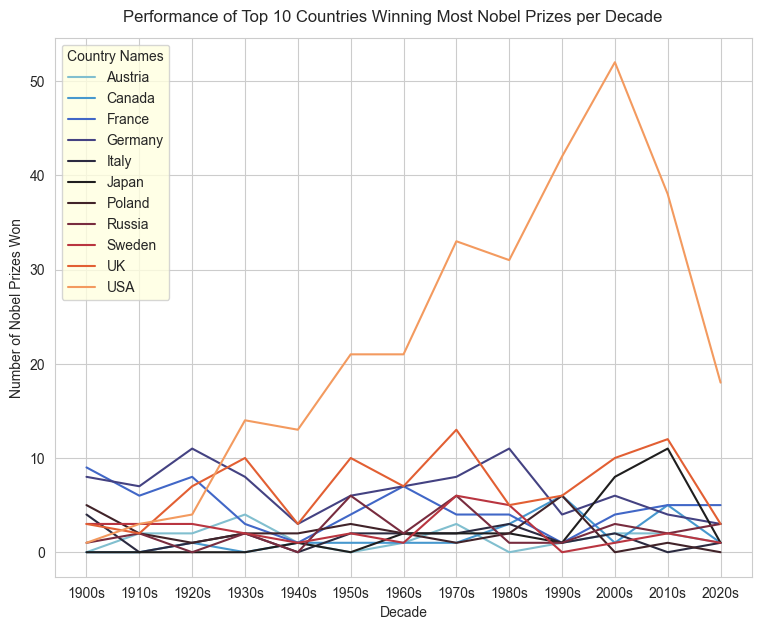

In [37]:
# I first look into the top 10 countries that have secured the most Nobel Prizes. 
# Based on this comparison, we expect to pinpoint from which decade precisely USA began climbing up the ladder.

top_10_nobel_country_names = processed_nobel_df['birth_country'].value_counts().sort_values(ascending=False).head(11)
print(f"Top country that has thus far secured the most Nobel Prize is {top_10_nobel_country_names.index[0]}.", '\n')

top_10_nobel_country_names = top_10_nobel_country_names.index.tolist() # Loading Top 10 Countries' Names into a List

top_10_nobel_df = processed_nobel_df[processed_nobel_df['birth_country'].isin(top_10_nobel_country_names)] # Subsetting the main Nobel DataFrame to include data only for these top 7 countries

top_10_nobel_count_per_country = top_10_nobel_df.groupby(['birth_country','decade']).agg(
   count_per_decade=('year','count')).reset_index()



# Seaborn and Matplotlib Data Visualisation

plt.figure(figsize=(9, 7)) # Setting the size of pur plot

sns.set_style("whitegrid") # Please run it twice if it is not on a whitegrid layout

sns.lineplot(x='decade', y='count_per_decade', hue='birth_country', data=top_10_nobel_count_per_country, 
           palette="icefire")

plt.suptitle('Performance of Top 10 Countries Winning Most Nobel Prizes per Decade', y=0.92)

plt.xlabel('Decade')
plt.ylabel('Number of Nobel Prizes Won')
plt.legend(title='Country Names').get_frame().set_facecolor('lightyellow')

plt.show()

# 5.1 Exploring potential factors as to how the US dominance skyrocketed as of 1930s by comparing each country's performance among one another per category

C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\2409114821.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enumerated_category = enumerated_category.groupby(['birth_country','decade']).agg(
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\2409114821.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enumerated_category = enumerated_category.groupby(['birth_country','decade']).agg(
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\2409114821.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

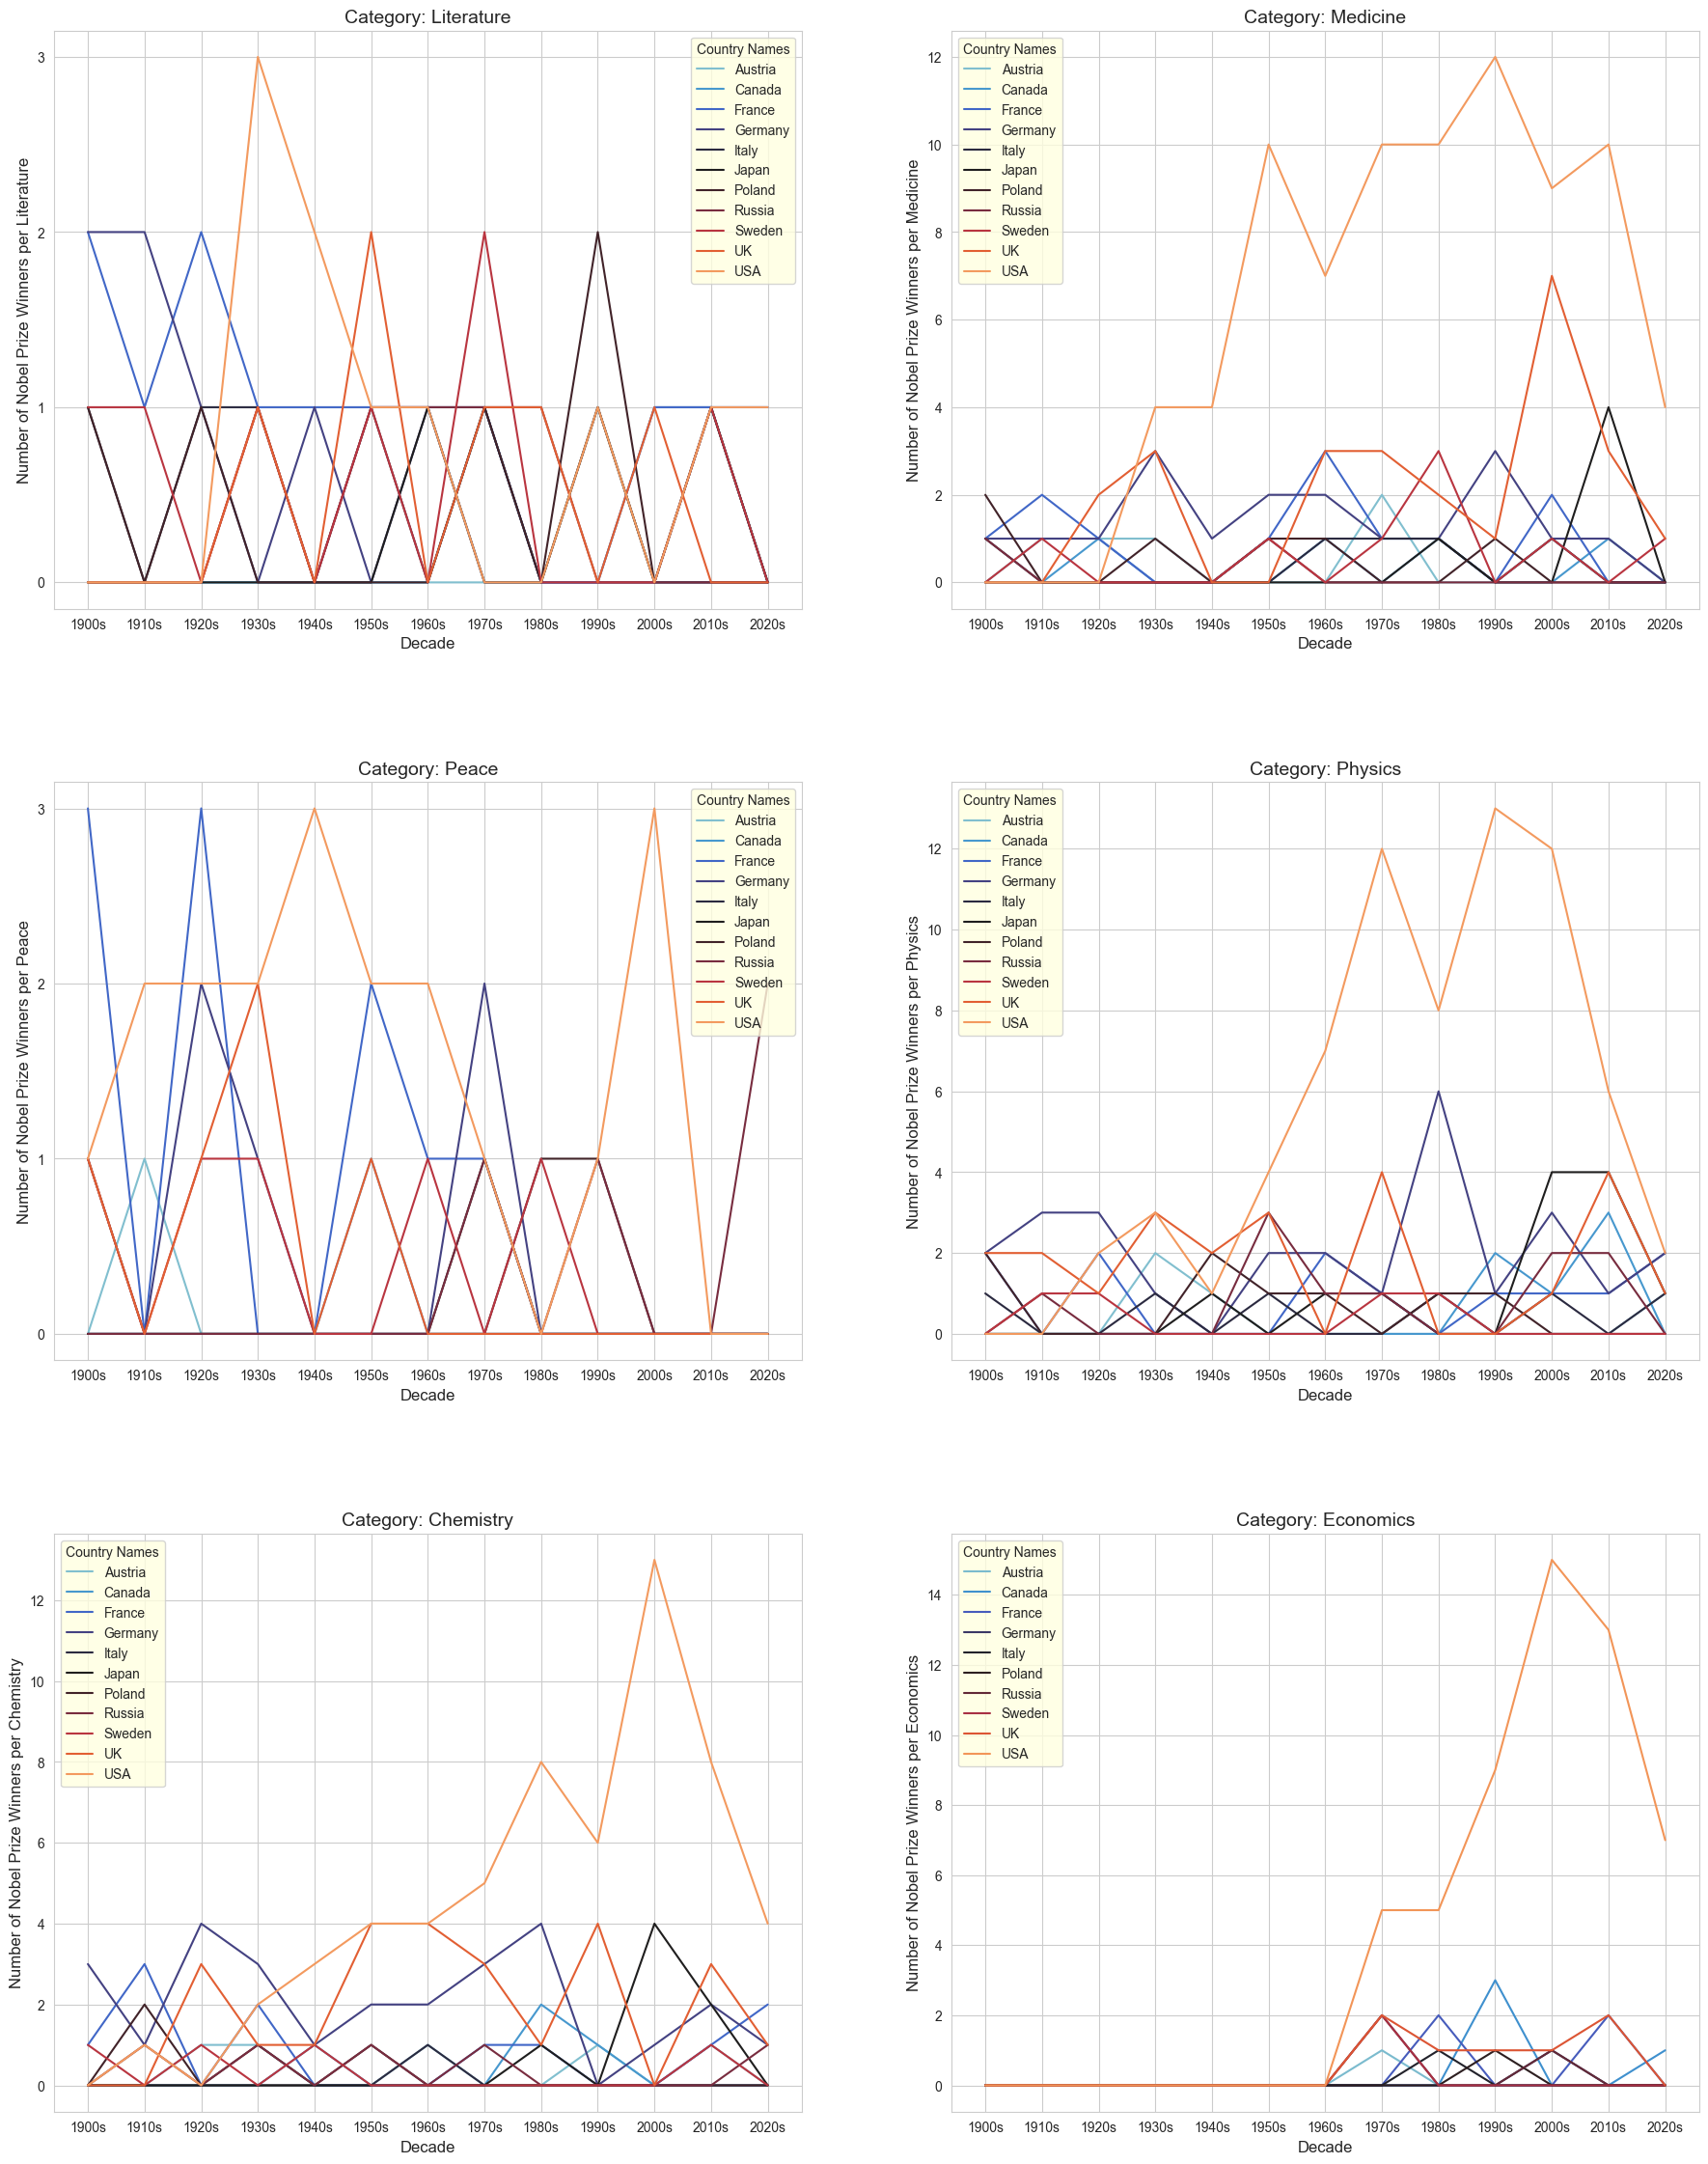

In [38]:

all_categories = top_10_nobel_df['category'].unique() # Getting unique category names


# Data Visualisation via Matplotlib and Seborn in an attempt to identify the factors

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 28)) # Setting our initial 3x2 visualisation layout
axes = axes.flatten()


for i, category in enumerate(all_categories):
    
    enumerated_category = top_10_nobel_df[top_10_nobel_df['category'] == category]
    
    enumerated_category = enumerated_category.groupby(['birth_country','decade']).agg(
    count_per_decade=('year','count')).reset_index()
    
    sns.lineplot(x='decade', y='count_per_decade', hue='birth_country', data=enumerated_category, ax=axes[i],
                palette='icefire')
    
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    axes[i].set_title(f'Category: {category}', fontsize=14)
    axes[i].set_ylabel(f"Number of Nobel Prize Winners per {category}", fontsize=12)
    axes[i].set_xlabel('Decade', fontsize=12)
    axes[i].legend(title='Country Names').get_frame().set_facecolor('lightyellow')

    
plt.subplots_adjust(hspace=0.3) # Adjusting the distance between each set of graphs
plt.show()

# 5.2 Exploration of the potential factors based on Gender:

C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\3573294704.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enumerated_gender = enumerated_gender.groupby(['birth_country','decade']).agg(
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\3573294704.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enumerated_gender = enumerated_gender.groupby(['birth_country','decade']).agg(


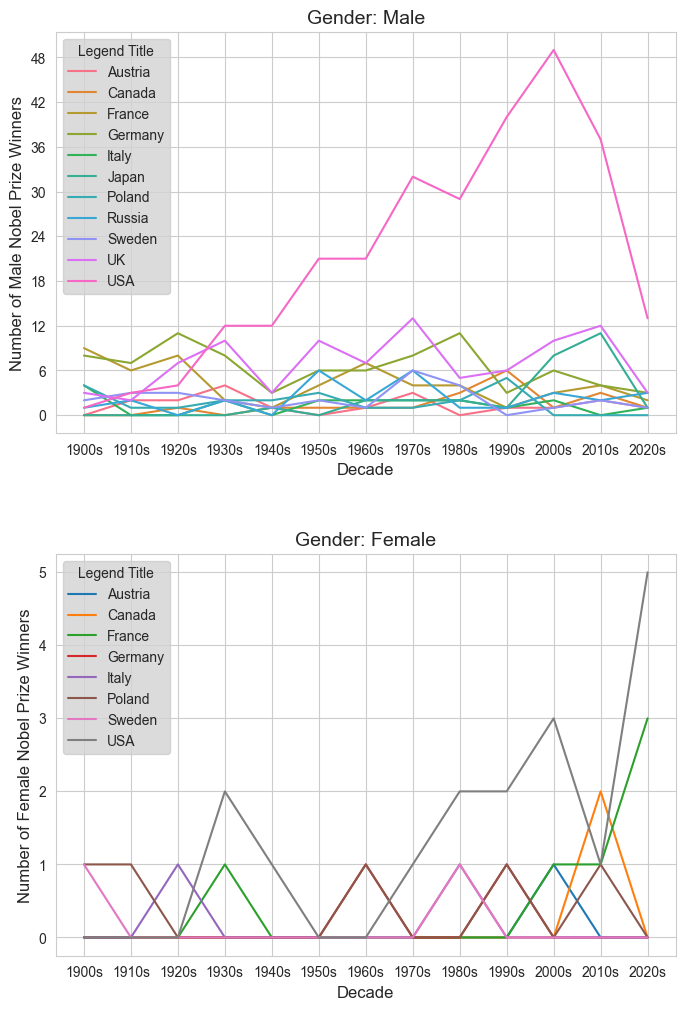

In [39]:

gender_classification = top_10_nobel_df['sex'].unique() # Getting unique category names


# Data Visualisation via Matplotlib and Seborn in an attempt to identify the factors

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12)) # Setting our initial 3x2 visualisation layout
axes = axes.flatten()

sns.set_style("whitegrid") # Please run it twice if it is not on a whitegrid layout


for i, gender in enumerate(gender_classification):

    enumerated_gender = top_10_nobel_df[top_10_nobel_df['sex'] == gender]
    
    enumerated_gender = enumerated_gender.groupby(['birth_country','decade']).agg(
    count_per_decade=('year','count')).reset_index()
    
    sns.lineplot(x='decade', y='count_per_decade', hue='birth_country', data=enumerated_gender, ax=axes[i])
    
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True)) 
    
    axes[i].set_title(f'Gender: {gender}', fontsize=14)
    axes[i].set_ylabel(f"Number of {gender} Nobel Prize Winners", fontsize=12)
    axes[i].set_xlabel('Decade', fontsize=12)
    
    axes[i].legend(title="Legend Title", loc="upper left").get_frame().set_facecolor('lightgray')  # Adjust parameters as needed
    
plt.subplots_adjust(hspace=0.3) # Adjusting the distance between each set of graphs
plt.show()


# 6. Proportion of US-born Nobel Prize Laureates per Decade:

C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\3976076162.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "USA"].groupby("decade").agg({"category":"count"})
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\3976076162.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  != "USA"].groupby("decade").agg({"category":"count"})


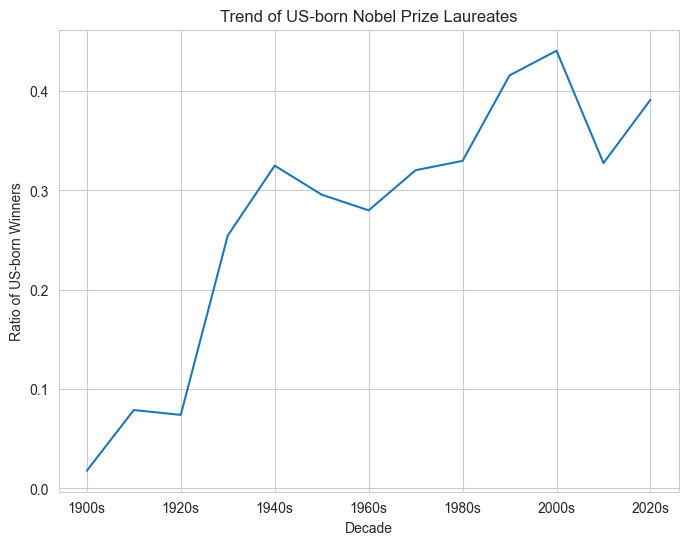

In [40]:
# Calculating the ratio below by counting all US-born winners per decade and dividing it by the total:

us_winners = processed_nobel_df[processed_nobel_df['birth_country'] == 
                              "USA"].groupby("decade").agg({"category":"count"})

non_us_winners = processed_nobel_df[processed_nobel_df['birth_country'] 
                                  != "USA"].groupby("decade").agg({"category":"count"})                                                                                                                

usa_born_winner_ratio_data = (us_winners / (us_winners + non_us_winners))


prop_usa_winners = usa_born_winner_ratio_data.reset_index().rename(columns={
   'category':'usa_born_winner_ratio'}) # Renaming the Count column 


# Data Visualisation via Seaborn and Matplotlib

plt.figure(figsize=(8, 6)) 
us_winners_lineplot = sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner_ratio')

plt.title('Trend of US-born Nobel Prize Laureates')

plt.xlabel('Decade')
plt.xticks(prop_usa_winners['decade'][::2])

plt.ylabel('Ratio of US-born Winners')

plt.show()

# 7. Visualizing Nobel Prize Winners based on Gender, Age at Winning Nobel and Decade attributes per award category:

I also noted that almost all the category-related information that were initially removed belong to the 'Peace'    Prizes, which I managed to include that back in in our Bar Plots: 
 



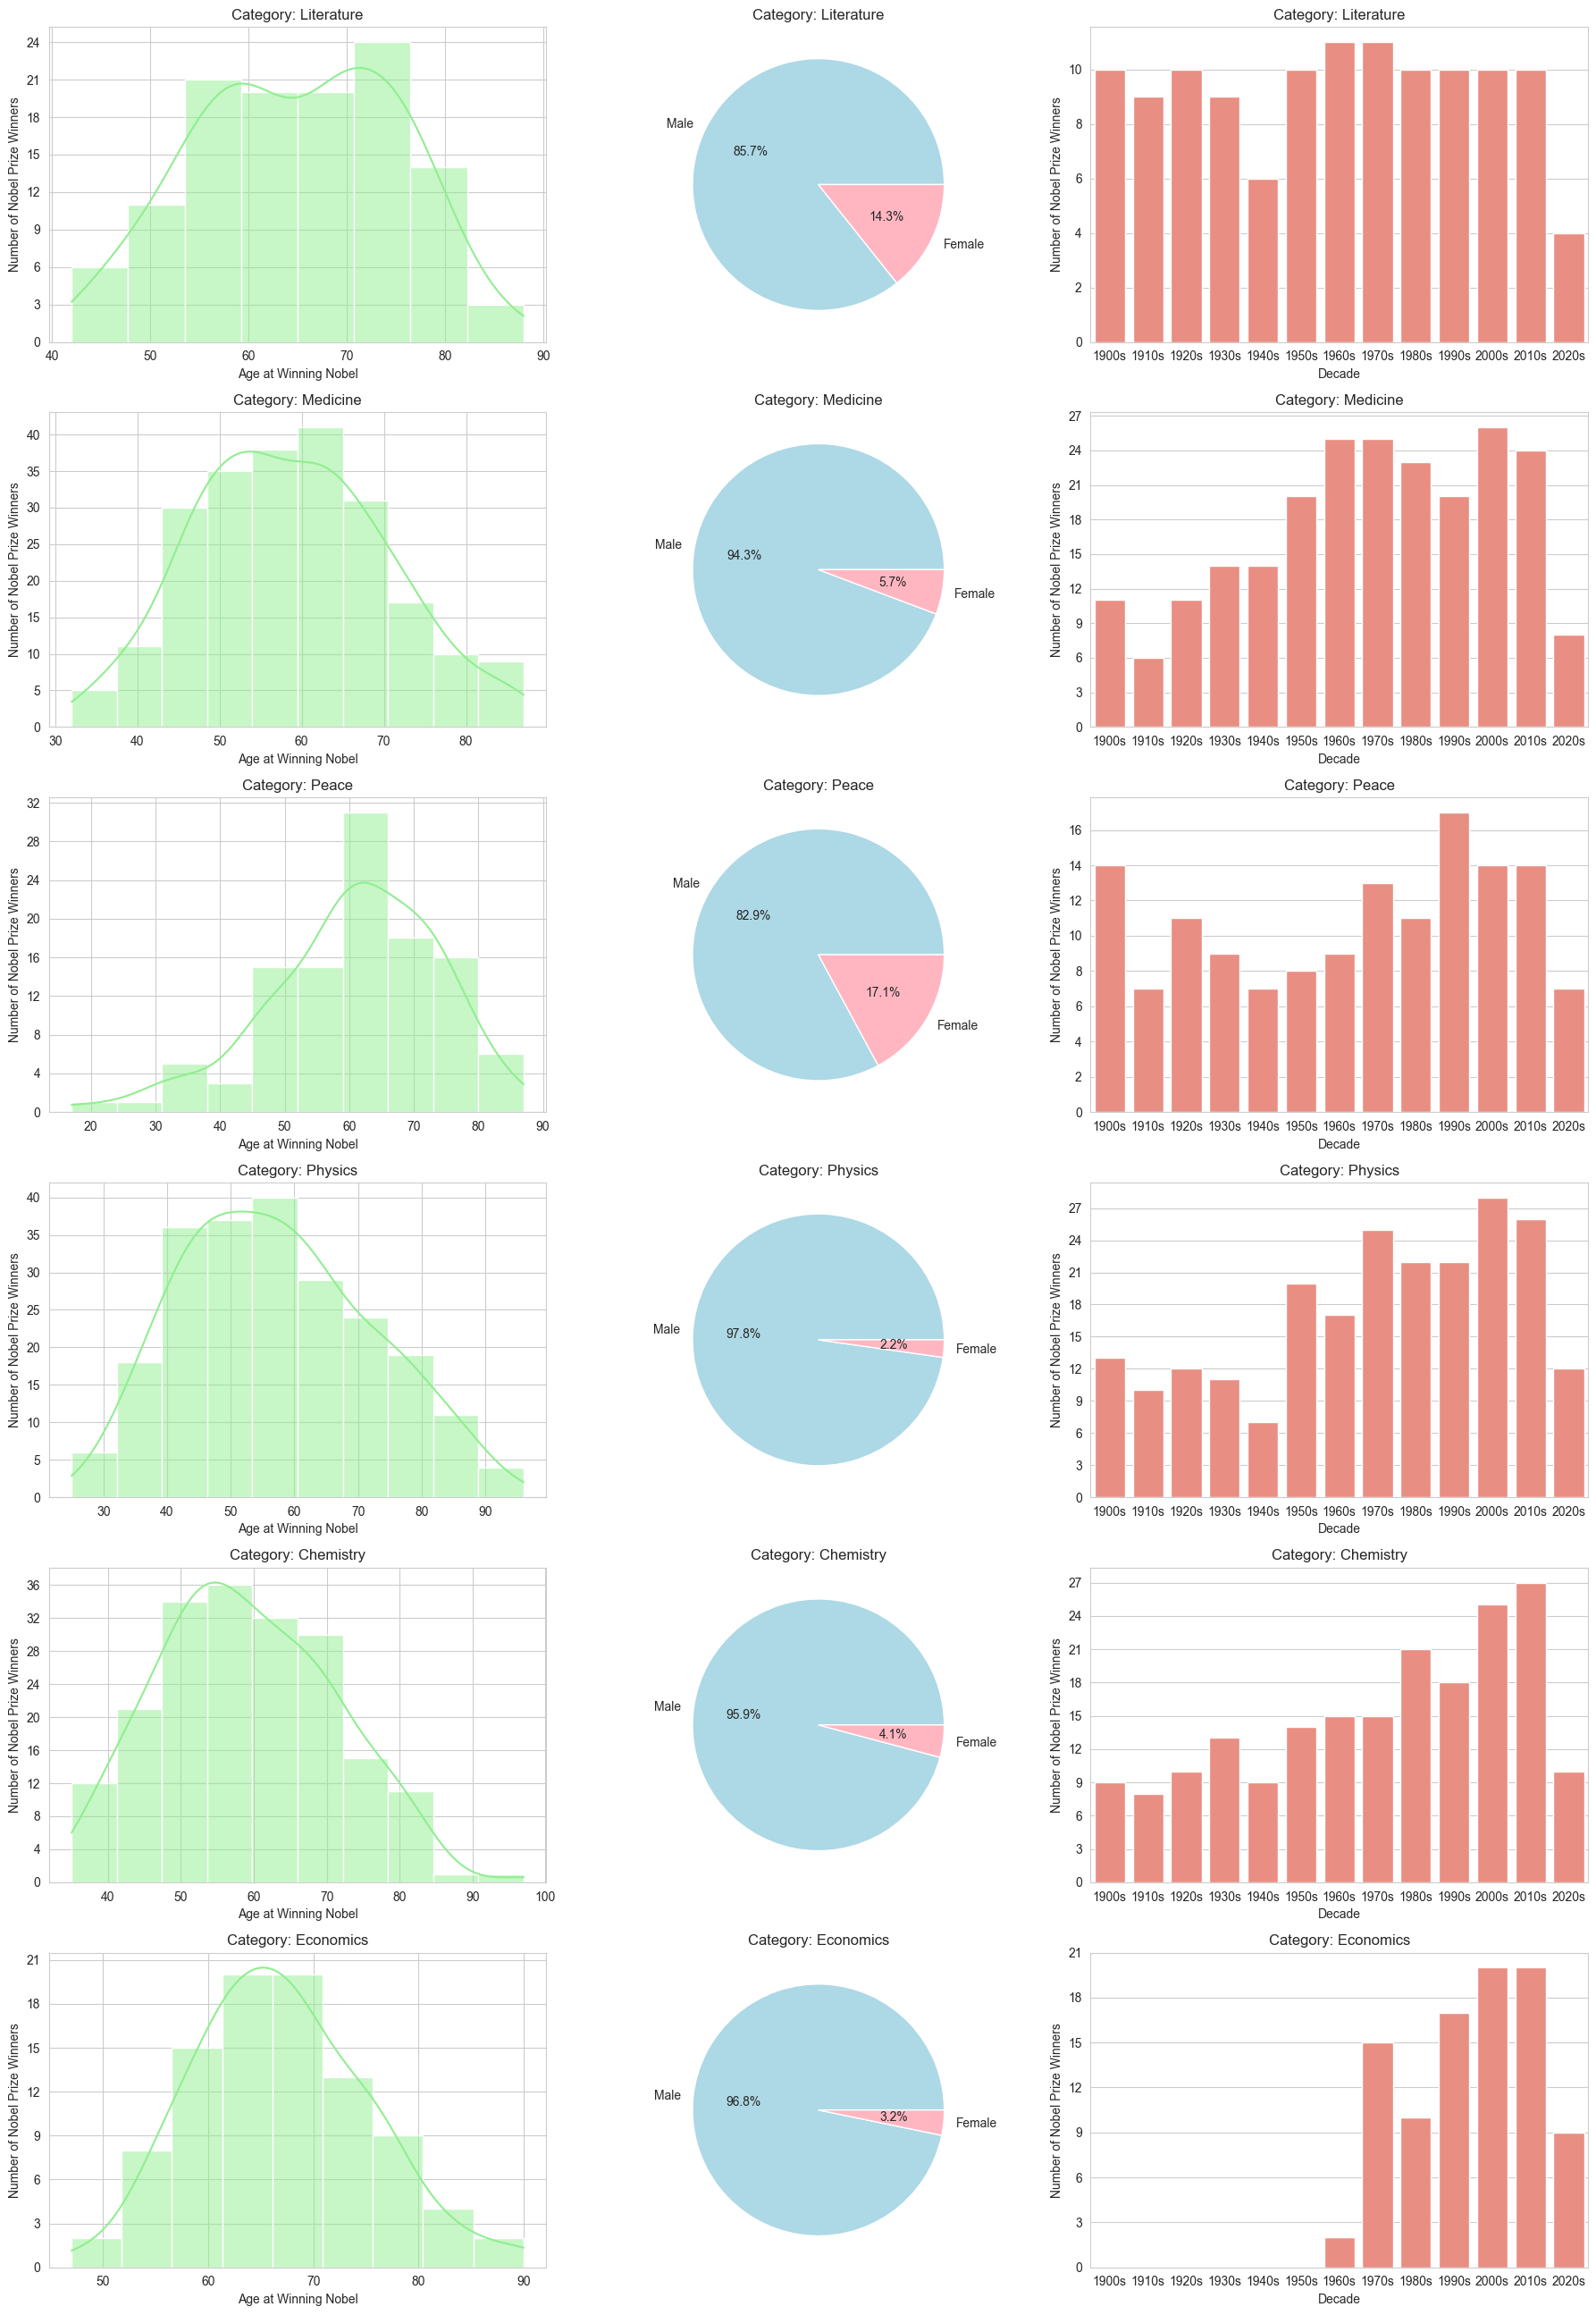

In [41]:
# Please note that I am not doing any further data manipulation work in this cell to address this request.
# As such, we are directly jumping into the Seaborn side of the equation.


# Seaborn and Matplotlib Data Visualisation

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 26)) # Setting the parameters for all of our subplots
axes = axes.flatten() # This piece of code was just needed to be able to run it to demonstrate the graphs

sns.set_style('whitegrid') # Please run it twice if it is not on a whitegrid layout


for i, category in enumerate(all_categories):
    
    
    # Subsetting the DataFrames each time per different category
    
    enumerated_category_data = processed_nobel_df[processed_nobel_df['category'] == category]  # Based on 883 records after removing records with NaNs on certain columns
    
    raw_enumerated_category_data = raw_nobel_df[raw_nobel_df['category'] == category] # Based on all 911 records
    
    
    # Histplot Visualisation of 'Age at Winning Nobel' Attribute - Based on 883 records
    
    ax_hist =  axes[i * 3]
    sns.histplot(data=enumerated_category_data, x='age_at_winning_nobel', color='lightgreen',
                 multiple='stack', kde=True, ax=ax_hist, legend=False)
    
    ax_hist.yaxis.set_major_locator(plt.MaxNLocator(integer=True)) # Handling float-derived xaxis labels
    
    ax_hist.set_title(f'Category: {category}')
    ax_hist.set_xlabel('Age at Winning Nobel', fontsize=10)
    ax_hist.set_ylabel('Number of Nobel Prize Winners', fontsize=10)
    
    
    # Piechart Visualisation of 'Gender' Attribute -  Based on 883 records
    
    ax_pie = axes[i * 3 + 1]
    sex_counts = enumerated_category_data['sex'].value_counts() # In order to get the Male/Female Ration in percentages
    ax_pie.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
    
    ax_pie.set_title(f'Category: {category}')
 

    # Barplot/Countplot Visualisation of 'Decade' Attribute - Based on all 911 records
    
    ax_count = axes[i * 3 + 2]
    sns.countplot(x='decade', data=raw_enumerated_category_data, hue='category', palette="dark:salmon_r", ax=ax_count)
    
    ax_count.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    ax_count.set_title(f'Category: {category}')
    ax_count.set_xlabel('Decade', fontsize=10)
    ax_count.set_ylabel('Number of Nobel Prize Winners', fontsize=10)
    ax_count.legend([], [], frameon=False) # Removing Legend on the Countplot as it is not needed
    

print(f"I also noted that almost all the category-related information that were initially removed belong to the 'Peace'    Prizes, which I managed to include that back in in our Bar Plots:", '\n', '\n')

plt.tight_layout()
plt.show()

# 8. Visualizing and interpreting the categories and countries of all Nobel Prize winners between 1938 and 1945 - during the Second World War:

C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\4245773019.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=raw_nobel_1938_1945_df, palette='viridis', order=category_order, ax=axes[0])
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\4245773019.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='birth_country', data=processed_nobel_1938_1945_df, palette='rocket', order=birth_country_order, ax=axes[1])


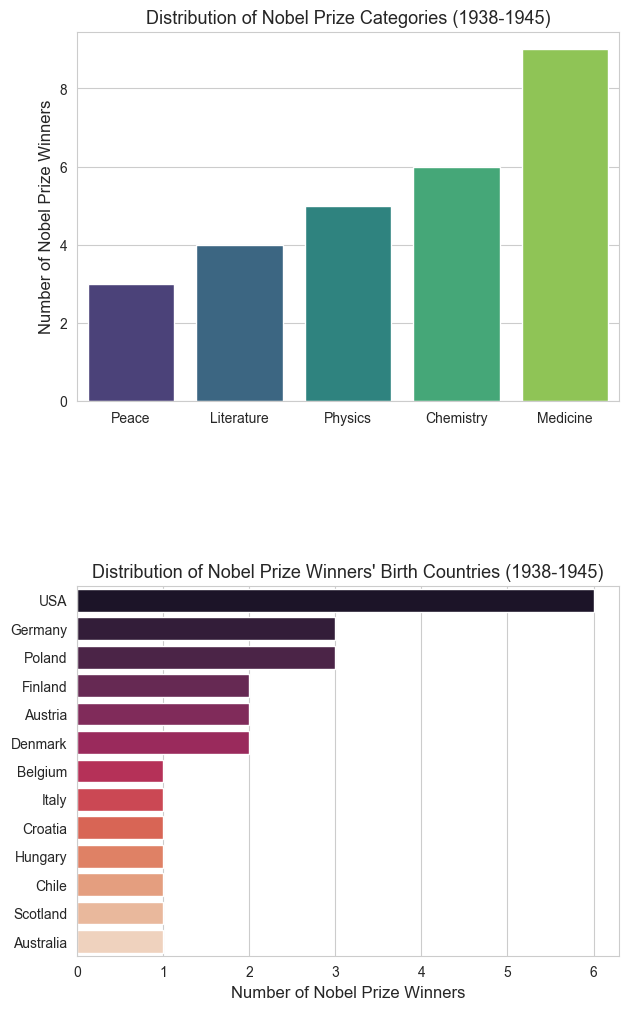

In [42]:
# Subsetting the DataFrames to include the data only for Nobel Prize winners between these years

processed_nobel_1938_1945_df = processed_nobel_df[(processed_nobel_df['year'] >= 1938) & (processed_nobel_df['year'] <= 1945)].reset_index(drop=True)

raw_nobel_1938_1945_df = raw_nobel_df[(raw_nobel_df['year'] >= 1938) & (raw_nobel_df['year'] <= 1945)].reset_index(drop=True)


# Seaborn and Matplotlib Data Visualisation

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 12)) # Setting the stage for data visualisation
axes = axes.flatten()


# Calculating Count per Category and Birth Country for Ascending and Descending Sorting Respectively

category_counts = raw_nobel_1938_1945_df['category'].value_counts(ascending=True)
category_order = category_counts.index

birth_country_counts = processed_nobel_1938_1945_df['birth_country'].value_counts()
birth_country_order = birth_country_counts.index


# Countplot Visualisation of 'Category' Attribute - Based on 911 records where year fits

sns.countplot(x='category', data=raw_nobel_1938_1945_df, palette='viridis', order=category_order, ax=axes[0])

axes[0].set_title('Distribution of Nobel Prize Categories (1938-1945)', fontsize=13)
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Nobel Prize Winners', fontsize=12)


# Countplot Visualisation of 'Birth Country' of Nobel Prize Winners - Based on 883 records where year fits

sns.countplot(y='birth_country', data=processed_nobel_1938_1945_df, palette='rocket', order=birth_country_order, ax=axes[1])

axes[1].set_title('Distribution of Nobel Prize Winners\' Birth Countries (1938-1945)', fontsize=13)
axes[1].set_ylabel('')
axes[1].set_xlabel('Number of Nobel Prize Winners', fontsize=12)


plt.subplots_adjust(hspace=0.5) # Adjusting the distance between the two graphs
plt.show()

# 9. Visualizing and interpreting the categories and countries of Nobel Prize winners between 1947 and 1991 - during the Cold War:

C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\258663066.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=enumerated_category, y='birth_country', palette='cubehelix',
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\258663066.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=enumerated_category, y='birth_country', palette='cubehelix',
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\258663066.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=enumerated_category, y='birth_country', palette='cubehelix',
C:\U

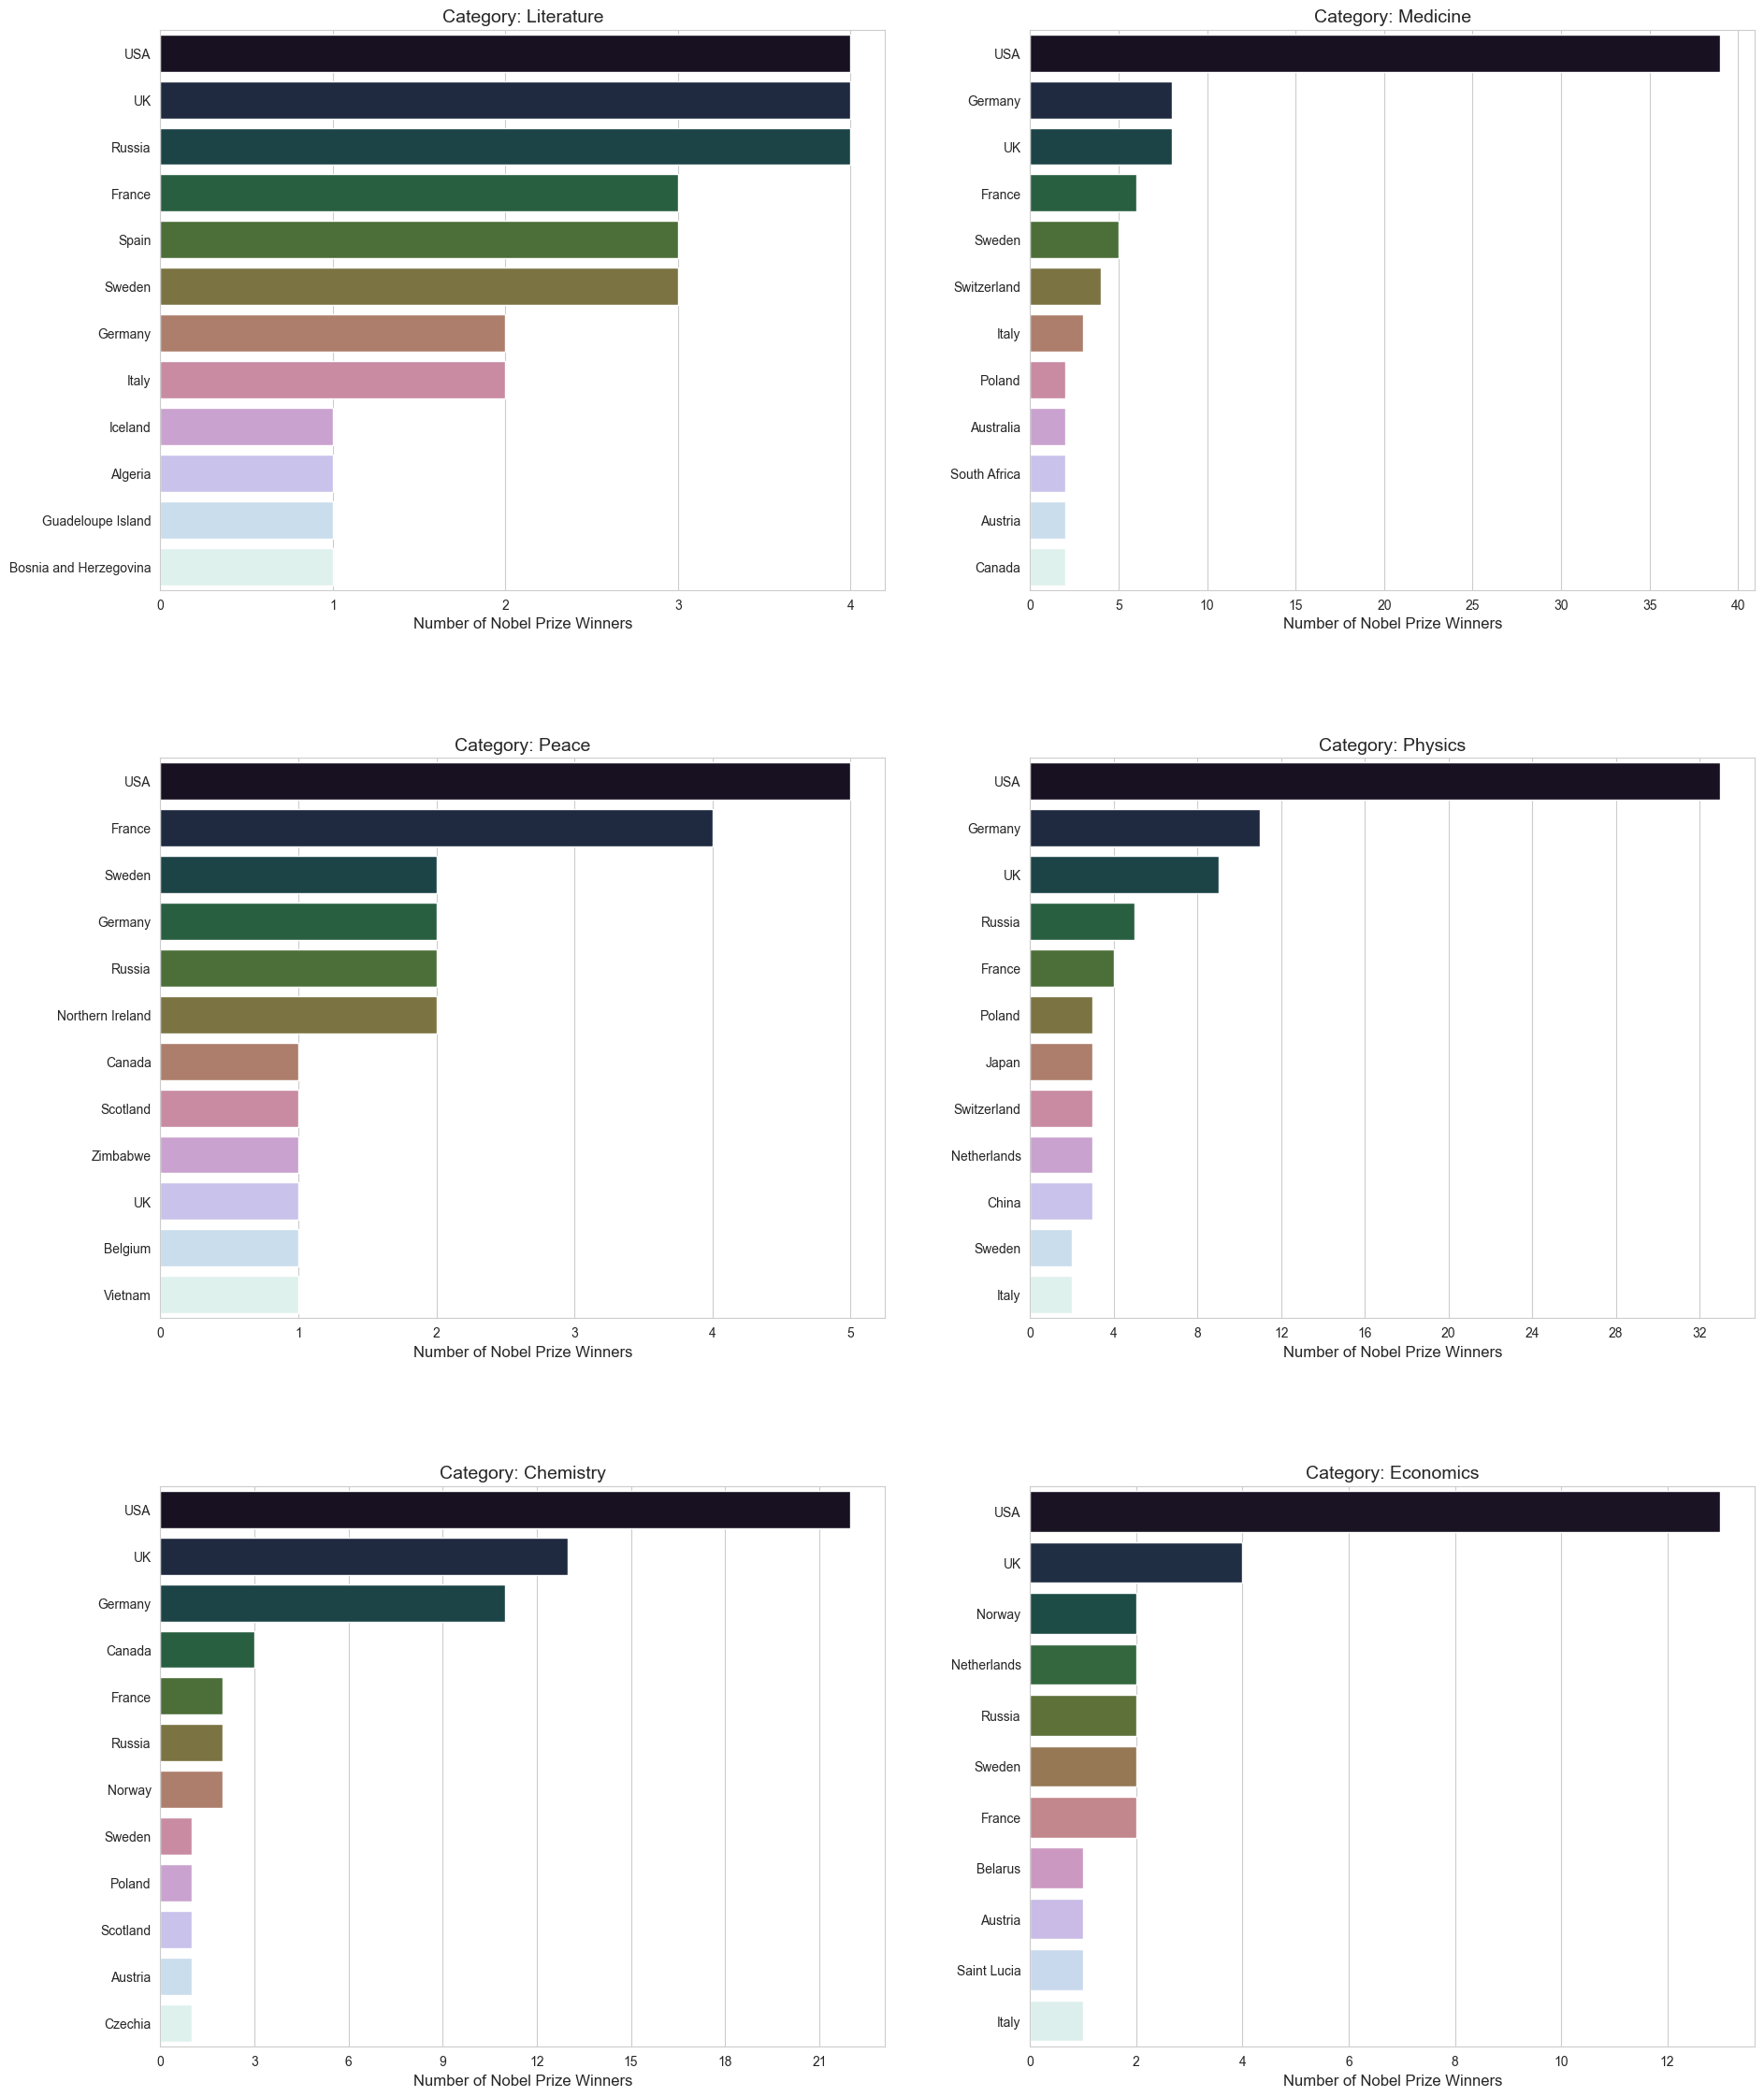

In [43]:

# A separate graph is also requested for each category.


# Subsetting the DataFrame to include the data only for Nobel Prize winners between these years

nobel_1947_1991_df = processed_nobel_df[(processed_nobel_df['year'] >= 1947) & (processed_nobel_df['year'] <= 1991)][['category', 'birth_country']].reset_index(drop=True)


# Seaborn and Matplotlib Data Visualisation

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 28))
axes = axes.flatten()

sns.set_style('darkgrid') # Please run it twice if it is not on a darkgrid layout


for i, category in enumerate(all_categories): # To be able to print out the respective data for each category
    
    
    # Subsetting the DataFrame each time per enumerated category
    
    enumerated_category = nobel_1947_1991_df[nobel_1947_1991_df['category'] == category] 
    
    top_10_countries = enumerated_category['birth_country'].value_counts().head(12) # Considering the first 12 countries
    top_10_country_order = top_10_countries.index
    
    sns.countplot(data=enumerated_category, y='birth_country', palette='cubehelix', 
                  order=top_10_country_order, ax=axes[i])
    
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True)) # Handling float-derived xaxis labels
    
    axes[i].set_title(f'Category: {category}', fontsize=14)
    
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Number of Nobel Prize Winners', fontsize=12)
    


plt.subplots_adjust(hspace=0.3)  # Adjusting the distance between each set of graphs
plt.show()

# 10. Visualizing the countries and ages of individuals in the Chemistry, Literature, Peace, Physics and Medicine categories who received Nobel Prizes after 2000:

C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\3435982401.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=enumerated_category, y='birth_country', palette='Spectral', order=top_10_country_order,
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\3435982401.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=enumerated_category, y='birth_country', palette='Spectral', order=top_10_country_order,
C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\3435982401.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=enumerat

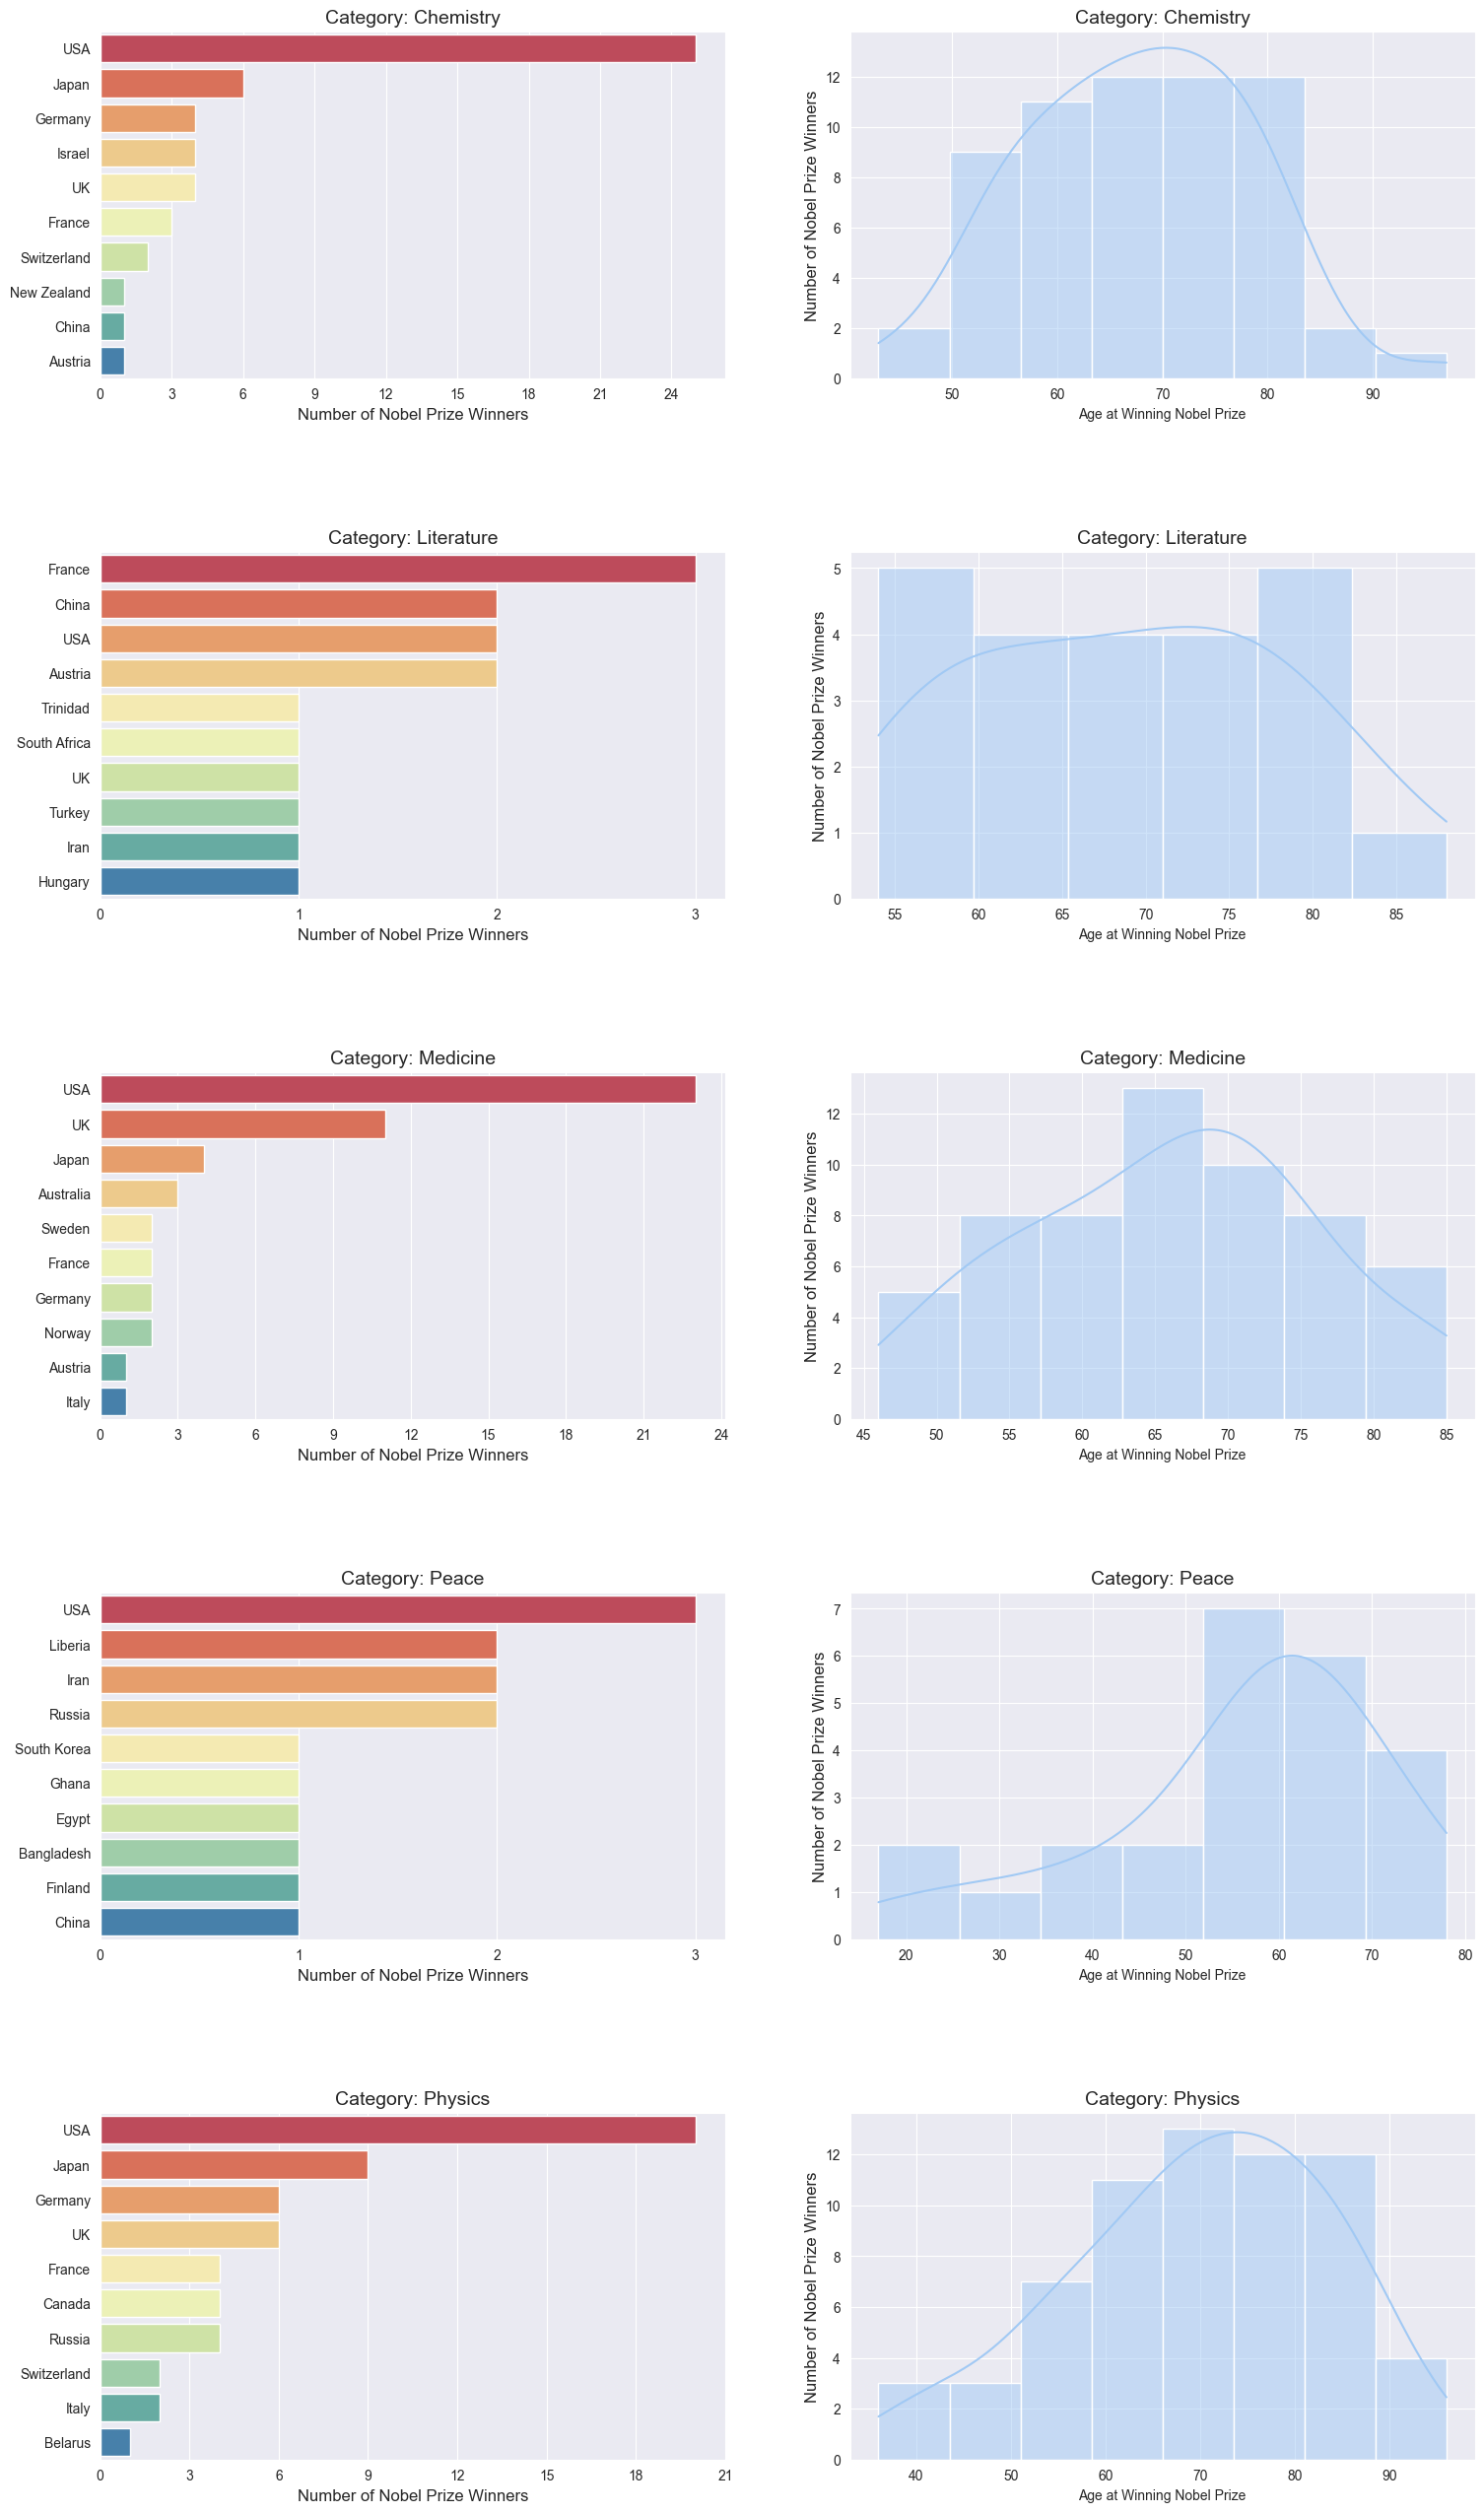

In [44]:
# A separate visualization is also requested for each category.


# Subsetting the DataFrame to include the data only for Nobel Prize winners after 2000 in certain categories

except_eco_nobel_2000s_df = processed_nobel_df[(processed_nobel_df['category'].isin(['Chemistry', 'Literature', 
                                                                    'Peace', 'Physics', 'Medicine']))
                                    & (processed_nobel_df['year'] >= 2000)].reset_index(drop=True)


specific_categories = except_eco_nobel_2000s_df['category'].unique()



# Seaborn and Matplotlib Data Visualisation

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 32))
axes = axes.flatten()

sns.set_style('whitegrid')  # Please run it twice if it is not on a whitegrid layout


for i, category in enumerate(specific_categories):
    
    
    # Subsetting the DataFrame each time per different category
    
    enumerated_category = except_eco_nobel_2000s_df[except_eco_nobel_2000s_df['category'] == category] 
    
    
    
    # Barplot/Countplot Visualisation of 'Decade' Attribute
    
    top_10_countries = enumerated_category['birth_country'].value_counts().head(10)
    top_10_country_order = top_10_countries.index
    
    ax_count =  axes[i * 2]
    sns.countplot(data=enumerated_category, y='birth_country', palette='Spectral', order=top_10_country_order, 
                  ax=ax_count)
    
    ax_count.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
   
    ax_count.set_title(f'Category: {category}', fontsize=14)
    
    ax_count.set_xlabel('Number of Nobel Prize Winners', fontsize=12)
    ax_count.set_ylabel('')
   
    
    
    # Histplot Visualisation of 'Age at Winning Nobel' Attribute
    
    ax_hist = axes[i * 2 + 1]
    sns.histplot(data=enumerated_category, x='age_at_winning_nobel', hue='category', multiple='stack', kde=True,
                 palette='pastel', ax=ax_hist, legend=False)
    
    ax_hist.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    ax_hist.set_title(f'Category: {category}', fontsize=14)
    
    ax_hist.set_xlabel('Age at Winning Nobel Prize')
    ax_hist.set_ylabel('Number of Nobel Prize Winners', fontsize=12)
     

plt.subplots_adjust(hspace=0.5) # Adjusting the distance between each set of graphs
plt.show()

In [45]:
# The End

# 11 .  Detecting Outliers in Age at Winning Nobel Prize (Identify Nobel Prize winners whose age at the time of winning is significantly different (too young or too old) compared to the majority).

📌 Outliers in Age at Winning Nobel Prize:
            full_name  age_at_winning_nobel  year   category
885  Malala Yousafzai                    17  2014      Peace
942   John Goodenough                    97  2019  Chemistry

Total Outliers Detected: 2


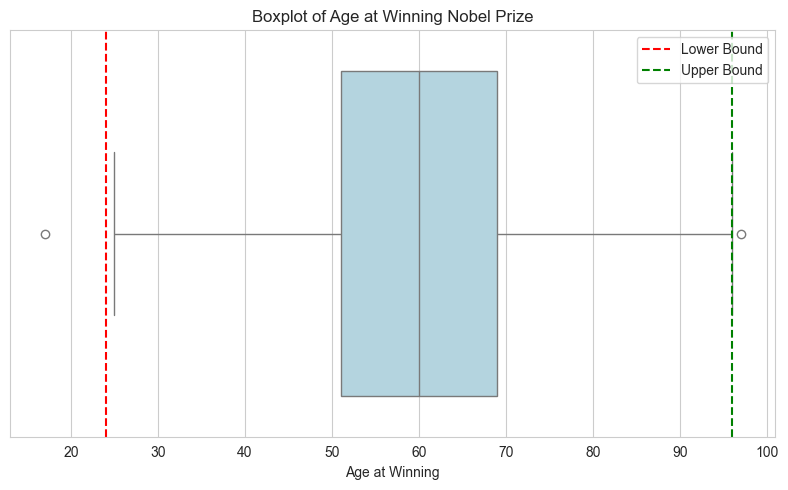

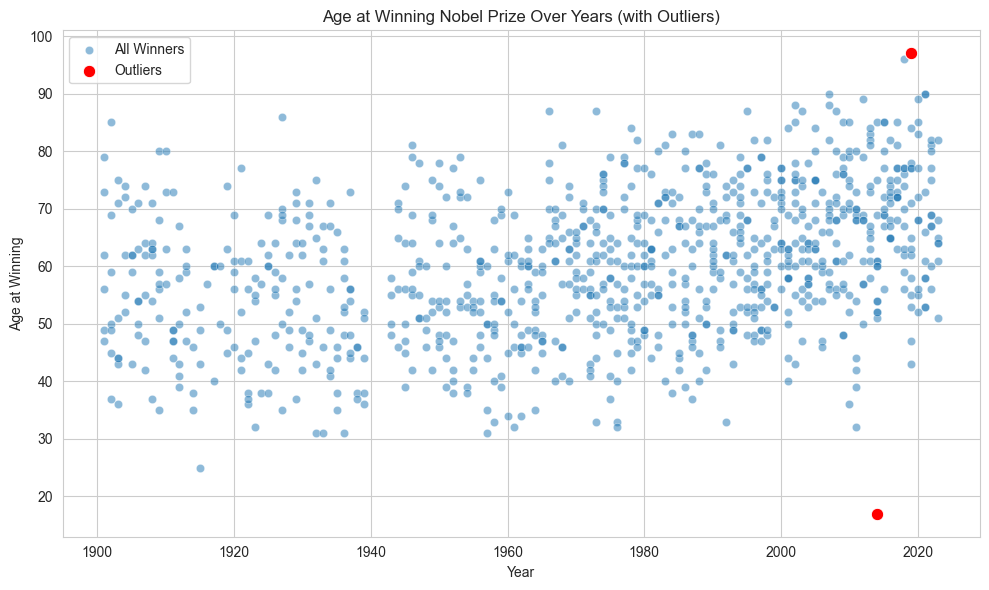

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
processed_nobel_df = pd.read_csv('Dataset/nobel_dataset.csv')

# Step 2: Convert 'birth_date' to datetime
processed_nobel_df['birth_date'] = pd.to_datetime(processed_nobel_df['birth_date'], errors='coerce')

# Step 3: Drop rows where birth_date or year is missing
processed_nobel_df = processed_nobel_df.dropna(subset=['birth_date', 'year'])

# Step 4: Calculate age at winning
processed_nobel_df['age_at_winning_nobel'] = processed_nobel_df['year'] - processed_nobel_df['birth_date'].dt.year

# Step 5: Remove invalid ages (optional: age < 0 or too large)
processed_nobel_df = processed_nobel_df[(processed_nobel_df['age_at_winning_nobel'] > 0) & 
                                        (processed_nobel_df['age_at_winning_nobel'] < 120)]

# Step 6: Calculate IQR
q1 = processed_nobel_df['age_at_winning_nobel'].quantile(0.25)
q3 = processed_nobel_df['age_at_winning_nobel'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Step 7: Filter outliers
age_outliers = processed_nobel_df[
    (processed_nobel_df['age_at_winning_nobel'] < lower_bound) |
    (processed_nobel_df['age_at_winning_nobel'] > upper_bound)
]

# Step 8: Display outliers
print("📌 Outliers in Age at Winning Nobel Prize:")
print(age_outliers[['full_name', 'age_at_winning_nobel', 'year', 'category']])
print(f"\nTotal Outliers Detected: {len(age_outliers)}")

# Step 9: Visualization - Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=processed_nobel_df['age_at_winning_nobel'], color='lightblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Boxplot of Age at Winning Nobel Prize')
plt.xlabel('Age at Winning')
plt.legend()
plt.tight_layout()
plt.show()

# Step 10: Visualization - Scatter Plot with Outliers Highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=processed_nobel_df, x='year', y='age_at_winning_nobel', label='All Winners', alpha=0.5)
sns.scatterplot(data=age_outliers, x='year', y='age_at_winning_nobel', color='red', label='Outliers', s=80)
plt.title('Age at Winning Nobel Prize Over Years (with Outliers)')
plt.xlabel('Year')
plt.ylabel('Age at Winning')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 12 . Identifying Outlier Countries Based on Nobel Prize Wins(Detect countries with an unusually high or low number of Nobel Prizes compared to the global distribution)

📌 Outlier Countries Based on Nobel Prize Wins:
birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Japan                        28
Canada                       21
Netherlands                  19
Switzerland                  19
Italy                        18
Russia                       18
Austria                      16
Norway                       13
Denmark                      12
China                        11
Scotland                     10
Australia                    10
South Africa                  9
Belgium                       9
Name: count, dtype: int64


C:\Users\jabhi\AppData\Local\Temp\ipykernel_15340\3257383727.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlier_countries.index, y=outlier_countries.values, palette='magma')


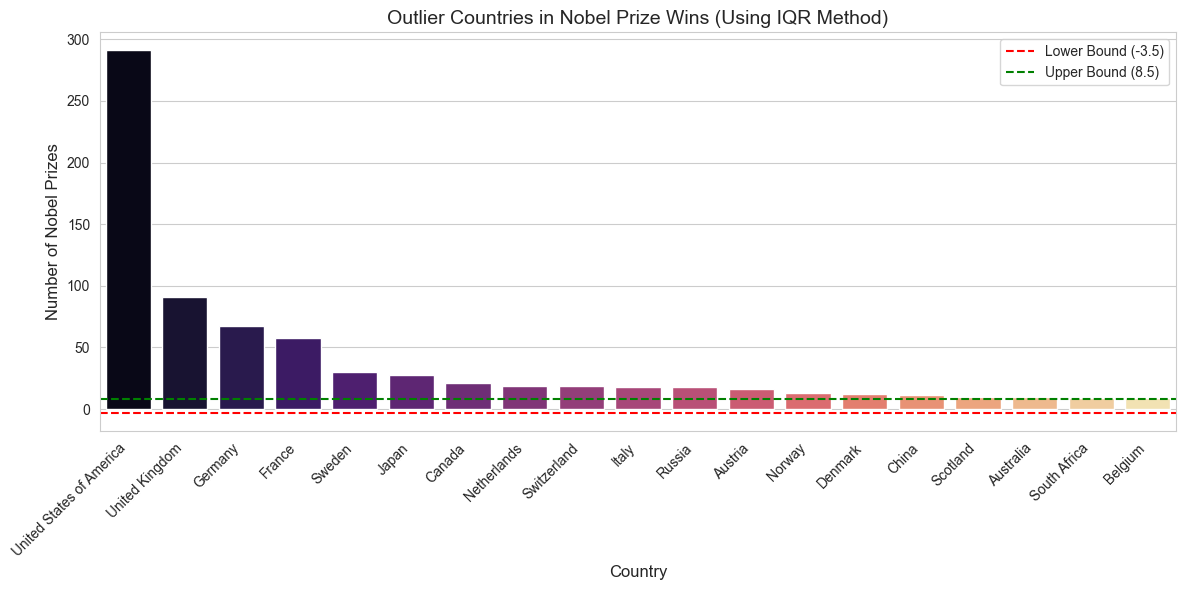

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
processed_nobel_df = pd.read_csv('Dataset/nobel_dataset.csv')

# Step 1: Count Nobel Prizes by birth country
country_counts = processed_nobel_df['birth_country'].value_counts()

# Step 2: Calculate IQR to detect outliers
q1 = country_counts.quantile(0.25)
q3 = country_counts.quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Step 3: Filter outliers
outlier_countries = country_counts[(country_counts < lower_bound) | (country_counts > upper_bound)]

# Print outliers
print("📌 Outlier Countries Based on Nobel Prize Wins:")
print(outlier_countries)

# Step 4: Visualize only the outliers
plt.figure(figsize=(12, 6))
sns.barplot(x=outlier_countries.index, y=outlier_countries.values, palette='magma')

# Add bounds as reference lines
plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.1f})')
plt.axhline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound:.1f})')

# Styling
plt.title('Outlier Countries in Nobel Prize Wins (Using IQR Method)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Nobel Prizes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# 13. Explore the correlation between the year a Nobel Prize was awarded, the birth year of the laureate, and their age at the time of winning

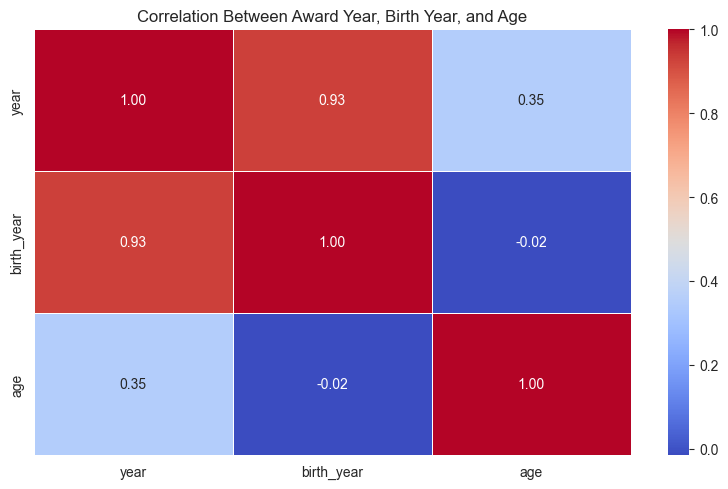

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Nobel Prize dataset
nobel_df = pd.read_csv("C:\\Users\\jabhi\\Downloads\\Python.-Exploration-of-All-Nobel-Prize-Winners-and-Intriguing-Hidden-Patterns-main\\Python.-Exploration-of-All-Nobel-Prize-Winners-and-Intriguing-Hidden-Patterns-main\\Dataset\\nobel_dataset.csv")

# 🧠 Extract birth year from 'birth_date' column
nobel_df['birth_year'] = pd.to_datetime(nobel_df['birth_date'], errors='coerce').dt.year

# 🧠 Create Age column
nobel_df['age'] = nobel_df['year'] - nobel_df['birth_year']

# 🎯 Select numeric columns for correlation
numeric_cols = nobel_df[['year', 'birth_year', 'age']].dropna()

# 📈 Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# 🌡️ Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Award Year, Birth Year, and Age")
plt.tight_layout()
plt.show()


# **Thank You**